In [215]:
import pandas as pd
import pandas_gbq
from google.oauth2 import service_account
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import yfinance as yf

# 1. Datos Mercado Libre
Son los datos de compra de vivienda en CABA

In [113]:
df_ml_compra = pd.read_csv("dataset/ml_compra_caba.csv")

In [114]:
df_ml_compra

,Fecha,Precio
0,2018-01-01,2771
1,2018-02-01,2810
2,2018-03-01,2848
3,2018-04-01,2869
4,2018-05-01,2874
...,...,...
58,2022-11-01,2289
59,2022-12-01,2268
60,2023-03-01,2295
61,2023-02-01,2236


# 2. Tablas de Properati

In [4]:
bq_cred = service_account.Credentials.from_service_account_file('./tokens/gcp_token.json')

bq_cred

In [5]:
sql = """SELECT * FROM `midyear-bivouac-388911.argentina_real_estate_listings.clase13`"""
df_bq = pd.read_gbq(sql, project_id='midyear-bivouac-388911', credentials = bq_cred, dialect='standard')

df_bq.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Empresa
0,0,2023-01-03,130.279999,130.899994,124.169998,125.070000,NaN,112117500,Apple
1,1,2023-01-04,126.889999,128.660004,125.080002,126.360001,NaN,89113600,Apple
2,2,2023-01-05,127.129997,127.769997,124.760002,125.019997,NaN,80962700,Apple
3,3,2023-01-06,126.010002,130.289993,124.889999,129.619995,NaN,87754700,Apple
4,4,2023-01-09,130.470001,133.410004,129.889999,130.149994,NaN,70790800,Apple


In [8]:
lista_alquiler = []

query = """SELECT * FROM `midyear-bivouac-388911.argentina_real_estate_listings.properties_rent_201501`"""
df_properati = pd.read_gbq(query, project_id = "midyear-bivouac-388911", credentials = bq_cred, dialect = 'standard')

df_properati[df_properati["state_name"] == "Capital Federal"]

GenericGBQException: Reason: 404 Not found: Table midyear-bivouac-388911:argentina_real_estate_listings.properties_rent_201513 was not found in location US

Location: US
Job ID: de56927a-fe1c-4b32-9c23-f63df77576e3


In [31]:
lista_alquiler = []

años = "15"
meses = "01"

for i in range(5,9):
    año = 0
    print(i)
    for a in range(1,13):
        print(a)

5
1
2
3
4
5
6
7
8
9
10
11
12
6
1
2
3
4
5
6
7
8
9
10
11
12
7
1
2
3
4
5
6
7
8
9
10
11
12
8
1
2
3
4
5
6
7
8
9
10
11
12


In [41]:
lista_alquiler = []

try:
    for año in range(5,9):
        año_actual = f"201{str(año)}"
        for mes in range(1,13):
            query = f"""SELECT * FROM `midyear-bivouac-388911.argentina_real_estate_listings.properties_rent_{año_actual}{str(mes).zfill(2)}`"""

            df_properati = pd.read_gbq(query, project_id = "midyear-bivouac-388911", credentials = bq_cred, dialect = 'standard')

            lista_alquiler.append(df_properati)
except:
    pass

In [ ]:
lista_alquiler = []

for año in range(5,9):
        año_actual = f"201{str(año)}"
        for mes in range(1,13):
            query = f"""SELECT * FROM `midyear-bivouac-388911.argentina_real_estate_listings.properties_rent_{año_actual}{str(mes).zfill(2)}`"""

            df_properati = pd.read_gbq(query, project_id = "midyear-bivouac-388911", credentials = bq_cred, dialect = 'standard')

            lista_alquiler.append(df_properati)

In [42]:
len(lista_alquiler)

38

In [43]:
copia_lista_alquiler = lista_alquiler

In [49]:
alquiler_2015 = pd.concat(lista_alquiler[0:3])

In [51]:
alquiler_2015

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c6bd9655ab214262f35dc01991e93257ef27a80e,2014-10-14,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4130559,-64.1635496",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/j1jl_alquiler_depa...,CODIGO: ubicado en: Av. 24 de Septiembre 1500...,1 dormitorio Av. 24 de Septiembre al 1500,https://thumbs4.properati.com/4/EgZ85yu3sEnl75...
1,271e03d0640ca794bd0c96185cbe6565e5cbb532,2015-01-27,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-32.2492552,-62.6383524",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/kl57_alquiler_depa...,CODIGO: 928-AAA2 ubicado en: CONSTITUCION 515 ...,"HERMOSO DPTO 1 DORM., 1 CUADRA PLAZA CENTRAL, ...",https://thumbs4.properati.com/5/fw7PzqiMtqJIi1...
2,3c270a1a138cdc8caec56effb996e466ddf32b7d,2014-09-12,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4058291,-64.166296",...,<NA>,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/ihr7_alquiler_depa...,CODIGO: ubicado en: ARMENIA 1500 - Publicado...,ALQUILER- DEPARTAMENTO 1 DORM Bº PUEYRREDON,https://thumbs4.properati.com/7/3hUY0xZYvBs9a0...
3,41ef61845ba4e05528569a1890520abc28409862,2014-11-21,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.3866062,-64.216713",...,28,NaN,66.071429,<NA>,<NA>,<NA>,http://www.properati.com.ar/jru5_alquiler_depa...,CODIGO: ubicado en: AV CARAFFA ESQUINA GATO Y...,VILLA CABRERA - MONOAMBIENTE - Av CARAFFA ALQ...,https://thumbs4.properati.com/9/_bLCgo7EEuQaUj...
4,565382b9fb48cebf10820a8010fa33ff1ffa195b,2014-12-02,rent,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.4016324,-64.1678943",...,400,NaN,18.750000,<NA>,<NA>,<NA>,http://www.properati.com.ar/jx35_alquiler_casa...,CODIGO: ubicado en: ROMA 1300 - Publicado po...,ALQUILER__Bº PUEYRREDON CASA 3 DORM.(roma 1300),https://thumbs4.properati.com/2/XpLMkJyw06Gjyd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,c68a7554dcd6ae34b7ceb2cde8f931db8b575e31,2014-12-22,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k4ph_alquiler_casa...,Para mas informacion en nuestra pagina Daniel ...,Casa alquiler,https://thumbs4.properati.com/9/JyVrcVM4Iu8097...
3447,4c8db5d9a7d341658b33f2c165d568554768a81a,2015-01-20,rent,apartment,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kieg_alquiler_depa...,Para mas informacion en nuestro portal danielb...,Departamentos alquiler,https://thumbs4.properati.com/9/j1U-ezSfmrsDAo...
3448,c01e4c0a5ab76d5c687c3ce0f81cb0463c57a055,2014-12-27,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k6o2_alquiler_casa...,Para mas informacion en nuestro blog Danielbri...,Casa alquiler,https://thumbs4.properati.com/1/CSUmwc69O49kMC...
3449,24ffa7cd94a6f3b74c5df6fbb833bcabe480d1d1,2015-01-24,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,<NA>,3.318,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kksw_alquiler_casa...,Para mas informacion en nuestro portal danielb...,Casa alquiler,https://thumbs4.properati.com/9/GdOXpqc1h1DWvE...


In [77]:
año = 2015
mes = 1
for i in lista_alquiler:
    if mes > 12:
        mes = 1
        año += 1
    i["Fecha"] = f"{str(año)}-{str(mes).zfill(2)}-01"
    ejemplo = f"{str(año)}-{str(mes).zfill(2)}-01"
    mes += 1
    print(ejemplo)

2015-01-01
2015-02-01
2015-03-01
2015-04-01
2015-05-01
2015-06-01
2015-07-01
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01
2016-01-01
2016-02-01
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01


In [78]:
lista_alquiler[3]

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Fecha
0,d14177a448001316811cd500948b40d5533c92e9,2015-01-21,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.3216746,-64.2682395",...,2.959200,40.000000,<NA>,<NA>,<NA>,http://www.properati.com.ar/kj3m_alquiler_depa...,Monoambiente en planta baja y otro en planta a...,ALQUILO MONOAMBIENTE A ESTRENAR. Dormitorio. 2...,https://thumbs4.properati.com/5/RKcNCT9spNVEXZ...,2015-04-01
1,d9793d162fe1020a55c9aa261e71a437f3b089fa,2015-03-19,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.410162,-64.2067261",...,NaN,NaN,<NA>,<NA>,<NA>,http://www.properati.com.ar/mseh_alquiler_depa...,CODIGO: 1283-ac223 ubicado en: 27 de abril - ...,"Alquilo dpto de dos dormitorios, living un bañ...",https://thumbs4.properati.com/7/fEO1RNMNw09blu...,2015-04-01
2,842baa8b35036a7c6571409a38c593c5e945855b,2015-02-27,rent,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.3855275,-64.2040525",...,4.622222,44.444444,<NA>,<NA>,<NA>,http://www.properati.com.ar/lktf_alquiler_depa...,"Departamento de tres dormitorios con placard, ...",Bº SAN MARTIN 3 DORMITORIOS Y 2 BAÑOS. 3 Dormi...,https://thumbs4.properati.com/4/UlSWycdNOwV593...,2015-04-01
3,ddde3539b616c80e5fc4469002933c2be8f741d7,2015-03-12,rent,store,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.3845093,-64.183923",...,NaN,69.230769,<NA>,<NA>,<NA>,http://www.properati.com.ar/mlh5_alquiler_otro...,OPORTUNIDAD LOCAL SOBRE FRAGUEIRO APTO PARA TO...,LOCAL ALTA CORDOBA FRAGUEIRO. 26 m2c,https://thumbs4.properati.com/4/iqdn-rd83XlE1Y...,2015-04-01
4,2132f082b54d37b1ece6c81c2cdc643cab96dadf,2015-03-12,rent,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255,"-31.394019,-64.1871655",...,1.815139,30.000000,<NA>,<NA>,<NA>,http://www.properati.com.ar/mlh6_alquiler_casa...,CASONA APTA COMERCIAL PUB RESTO FABRICA GIMNA...,Alta Cba. Casona ideal p/comercio. 350 m2. Dor...,https://thumbs4.properati.com/4/JjkxQvlFS6kPWk...,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,c68a7554dcd6ae34b7ceb2cde8f931db8b575e31,2014-12-22,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,3.318000,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k4ph_alquiler_casa...,Para mas informacion en nuestra pagina Daniel ...,Casa alquiler,https://thumbs4.properati.com/9/JyVrcVM4Iu8097...,2015-04-01
3504,24ffa7cd94a6f3b74c5df6fbb833bcabe480d1d1,2015-01-24,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,3.318000,NaN,<NA>,1,<NA>,http://www.properati.com.ar/kksw_alquiler_casa...,Para mas informacion en nuestro portal danielb...,Casa alquiler,https://thumbs4.properati.com/9/GdOXpqc1h1DWvE...,2015-04-01
3505,d8e3952c9df41adc6e6d10183ffe8134e248cad5,2014-12-22,rent,apartment,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,3.318000,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k4pe_alquiler_depa...,Para mas informacion en nuestra pagina Daniel ...,Departamentos alquiler,https://thumbs4.properati.com/6/KNg4iKfhNNJux0...,2015-04-01
3506,1c25ca22734a2268fcea5eef00027f8d45077b41,2014-12-23,rent,house,Valeria del Mar,|Argentina|Buenos Aires Costa Atlántica|Valeri...,Argentina,Buenos Aires Costa Atlántica,3427561,"-37.1400261,-56.8920174",...,3.318000,NaN,<NA>,1,<NA>,http://www.properati.com.ar/k5e6_alquiler_casa...,Para mas opciones en nuestro Blog Daniel Brigg...,Casa alquiler,https://thumbs4.properati.com/9/t8pY11tcJGHS9O...,2015-04-01


In [79]:
df_alquiler = pd.concat(lista_alquiler)

In [80]:
df_alquiler.to_csv("dataset/df_alquiler.csv",index = False)

In [81]:
df_alquiler_caba = df_alquiler[df_alquiler["state_name"] == "Capital Federal"]
df_alquiler_caba

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Fecha
41,592e5e03a301d299a7bd9dd5cb25b99bd2dba9cc,2014-12-22,rent,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-38.416097,-63.616672",...,7.584571,117.647059,<NA>,1,900,http://www.properati.com.ar/k4pm_alquiler_depa...,Departamento dúplex de 70 m2 con cochera inclu...,Departamentos alquiler,https://thumbs4.properati.com/6/CmiBjApL3aZtLb...,2015-01-01
42,9b254ef5797b842cf18729c4df9827332fdca285,2014-08-26,rent,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.607902,-58.390337",...,6.221719,83.333333,<NA>,5,1500,http://www.properati.com.ar/i5yi_alquiler_ofic...,DUEÑO DIRECTO CENTRO TRIBUNALES SAN NICOLAS A...,Departamentos alquiler,https://thumbs4.properati.com/5/EsfoslNeUvEOJF...,2015-01-01
43,6052eff893a6541b80eff7c92e2a84244a4a52f7,2015-01-22,rent,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.5815242,-58.4332607",...,6.250000,6.250000,<NA>,3,<NA>,http://www.properati.com.ar/kk3l_alquiler_depa...,Alquilar vivienda de 3 habitaciones totalmente...,Departamentos alquiler,https://thumbs4.properati.com/0/xboIRcD66_k4Ao...,2015-01-01
44,0127fd9d7382e8e8e98654b0f74c09a82d54f049,2014-12-02,rent,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.596975,-58.408897",...,11.945800,NaN,<NA>,2,1,http://www.properati.com.ar/jx0w_venta_departa...,EXCELENTE DEPARTAMENTO DE 2 AMBIENTES AMPLIOS!...,Departamentos alquiler,https://thumbs4.properati.com/0/qw_5oLQ2qj9kK0...,2015-01-01
45,c7fc7d25b11f8cb7fa5ca9d8ea913422f99cde64,2014-07-14,rent,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.558106,-58.455842",...,5.482391,86.363636,<NA>,4,200,http://www.properati.com.ar/hfyj_alquiler_depa...,Elerosa,Departamento alquiler,https://thumbs4.properati.com/2/SrozX6FK39DkAr...,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21799,ab3597d84c0580d44dd55081971df4fdb02e9fcf,2017-09-22,rent,store,San Cristobal,|Argentina|Capital Federal|San Cristobal|,Argentina,Capital Federal,3429153,"-34.6233314343,-58.40796369",...,5.460214,106.837607,<NA>,<NA>,<NA>,https://www.properati.com.ar/1fafs_alquiler_lo...,"LOTE IRREGULAR EN FORMA DE ""L"". CON UN FRENTE ...",AMPLIA PROPIEDAD APTA COMERCIAL,https://thumbs4.properati.com/1/cJx1fuiLSqf1jQ...,2018-02-01
21810,4e207b1a9dd51fff5ebc69d74ace62bed904ef57,2017-10-14,rent,apartment,Palermo Hollywood,|Argentina|Capital Federal|Palermo|Palermo Hol...,Argentina,Capital Federal,<NA>,"-34.5791214,-58.4420763",...,12.168476,294.117647,<NA>,3,<NA>,https://www.properati.com.ar/1gc75_alquiler_de...,RESERVADO! Impecable Loft en alquiler EQUIPADO...,"RESERVADO! SILOS DE DORREGO , ALQUILER CON MUE...",https://thumbs4.properati.com/4/Qw-_ryt9RflYkN...,2018-02-01
21821,e085d9eef378b5d1fba6aeeb6bc858669afddb46,2018-01-09,rent,apartment,Paternal,|Argentina|Capital Federal|Paternal|,Argentina,Capital Federal,3430087,"-34.60281754,-58.46221542",...,11.887436,275.000000,<NA>,<NA>,<NA>,https://www.properati.com.ar/1jf6t_alquiler_de...,"HERMOSO DEPARTAMENTO MODERNO, 2 AMBIENTES AL F...",Pje Granada 1665 - $ 8.800 - Departamento A...,https://thumbs4.properati.com/2/KWWVJ-ulnC-bn-...,2018-02-01
21825,f0c22177270a731b2393e2ea55a56a1bd831bc58,2017-12-05,rent,store,Tribunales,|Argentina|Capital Federal|Tribunales|,Argentina,Capital Federal,<NA>,"-34.6008,-58.388441",...,16.556283,325.000000,<NA>,20,<NA>,https://www.properati.com.ar/1imxw_alquiler_lo...,Excelente edificio con frente vidriado.-Consta...,Viamonte al 1500.- Edificio Comercial - Tribun...,https://thumbs4.properati.com/1/jBarG4KcwpGKnM...,2018-02-01


In [82]:
df_alquiler_caba.to_csv("dataset/df_alquiler_caba.csv", index = False)

In [85]:
df_alquiler_caba.loc[:, 'año_mes'] = df_alquiler_caba['Fecha'].str[:7]

In [122]:
precio_promedio_alquiler_caba = df_alquiler_caba.groupby("año_mes").agg({"price":"mean"}).astype(int)
precio_promedio_alquiler_caba

,price
año_mes,
2015-01,19151
2015-02,17613
2015-03,20911
2015-04,20082
2015-05,18506
2015-06,18822
2015-07,19150
2015-08,18938
2015-09,19890


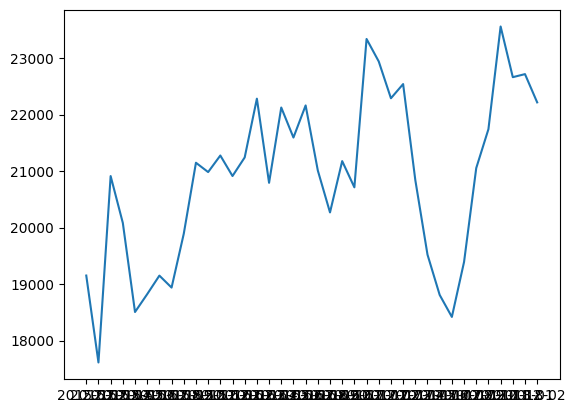

In [123]:
plt.plot(precio_promedio_alquiler_caba)
plt.show()

# Compra

In [105]:
lista_compra = []
tablas_leidas = 0

try:
    for año in range(5,9):
        año_actual = f"201{str(año)}"
        for mes in range(1,13):
            query = f"""SELECT * FROM `midyear-bivouac-388911.argentina_real_estate_listings.properties_sell_{año_actual}{str(mes).zfill(2)}` WHERE state_name = 'Capital Federal'"""

            df_properati = pd.read_gbq(query, project_id = "midyear-bivouac-388911", credentials = bq_cred, dialect = 'standard')

            lista_compra.append(df_properati)
            tablas_leidas += 1
            print(f"Tablas leidas: {tablas_leidas}")
except:
    pass

Tablas leidas: 1
Tablas leidas: 2
Tablas leidas: 3
Tablas leidas: 4
Tablas leidas: 5
Tablas leidas: 6
Tablas leidas: 7
Tablas leidas: 8
Tablas leidas: 9
Tablas leidas: 10
Tablas leidas: 11
Tablas leidas: 12
Tablas leidas: 13
Tablas leidas: 14
Tablas leidas: 15
Tablas leidas: 16
Tablas leidas: 17
Tablas leidas: 18
Tablas leidas: 19
Tablas leidas: 20
Tablas leidas: 21
Tablas leidas: 22
Tablas leidas: 23
Tablas leidas: 24
Tablas leidas: 25
Tablas leidas: 26
Tablas leidas: 27
Tablas leidas: 28
Tablas leidas: 29
Tablas leidas: 30
Tablas leidas: 31
Tablas leidas: 32
Tablas leidas: 33
Tablas leidas: 34
Tablas leidas: 35
Tablas leidas: 36
Tablas leidas: 37
Tablas leidas: 38


In [106]:
len(lista_compra)

38

In [107]:
copia_lista_compra = lista_compra

In [115]:
año = 2015
mes = 1
for i in lista_compra:
    if mes > 12:
        mes = 1
        año += 1
    i["Fecha"] = f"{str(año)}-{str(mes).zfill(2)}-01"
    ejemplo = f"{str(año)}-{str(mes).zfill(2)}-01"
    mes += 1
    print(ejemplo)

2015-01-01
2015-02-01
2015-03-01
2015-04-01
2015-05-01
2015-06-01
2015-07-01
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01
2016-01-01
2016-02-01
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01


In [116]:
df_compra_caba = pd.concat(lista_compra)

In [118]:
df_compra_caba.to_csv("dataset/df_compra_caba.csv", index = False)

In [119]:
df_compra_caba["año_mes"] = df_compra_caba["Fecha"].str[:7]
df_compra_caba.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Fecha,año_mes
0,422c5a4888286cf5966e548135c0c524da40696c,2014-11-22,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.622636073,-58.391393158",...,21835.294118,<NA>,1,<NA>,http://www.properati.com.ar/jtaf_venta_departa...,Corredor Responsable: Gustavo Guastello - C.U....,"MONOAMBIENTE EN 9° PISO ""B"" FTE. ENTREGA ESIMA...",https://thumbs4.properati.com/1/4GtRbgOAz3Mvf7...,2015-01-01,2015-01
1,79ad5a6361e58cbb076e2c00f3169a606b06240a,2014-12-02,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.601281,-58.379588",...,1970.588235,<NA>,2,570,http://www.properati.com.ar/jx0u_venta_departa...,Departamento APTO PROFESIONAL de dos ambientes...,Departamento venta,https://thumbs4.properati.com/9/S2GZ9iMdngVb7Z...,2015-01-01,2015-01
2,3eae1b9b501e0a2066f4832605fd679fde32ff25,2014-11-22,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.622636073,-58.391393158",...,20794.117647,<NA>,1,<NA>,http://www.properati.com.ar/jtae_venta_departa...,Corredor Responsable: Gustavo Guastello - C.U....,"MONOAMBIENTE EN 9° PISO ""C"" CFTE. ENTREGA ESIM...",https://thumbs4.properati.com/5/YcIQVRRRKghYhM...,2015-01-01,2015-01
3,6f76deb873400d13847872ba53da2f7379fd7f70,2014-09-10,sell,PH,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.585966,-58.388193",...,2959.259259,<NA>,4,<NA>,http://www.properati.com.ar/ig4m_venta_ph_capi...,Corredor Responsable: Luis Varela - C.U.C.I.C....,"HERMOSO DEPTO A RECICLAR, COCHERA Y PATIO DE 1...",https://thumbs4.properati.com/9/IfaC0GfLmaWJIe...,2015-01-01,2015-01
4,5265849a0eccadddb75e01c481a0f15f5107bb47,2014-11-04,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.64385,-58.415094",...,9450.000000,<NA>,4,<NA>,http://www.properati.com.ar/jbpb_venta_casa_ca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Excelente casa lote propio 4 Dorm/Quincho/terr...,https://thumbs4.properati.com/2/-TZikUWU9UNkYs...,2015-01-01,2015-01


In [160]:
df_compra_caba

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Fecha,año_mes
0,422c5a4888286cf5966e548135c0c524da40696c,2014-11-22,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.622636073,-58.391393158",...,21835.294118,<NA>,1,<NA>,http://www.properati.com.ar/jtaf_venta_departa...,Corredor Responsable: Gustavo Guastello - C.U....,"MONOAMBIENTE EN 9° PISO ""B"" FTE. ENTREGA ESIMA...",https://thumbs4.properati.com/1/4GtRbgOAz3Mvf7...,2015-01-01,2015-01
1,79ad5a6361e58cbb076e2c00f3169a606b06240a,2014-12-02,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.601281,-58.379588",...,1970.588235,<NA>,2,570,http://www.properati.com.ar/jx0u_venta_departa...,Departamento APTO PROFESIONAL de dos ambientes...,Departamento venta,https://thumbs4.properati.com/9/S2GZ9iMdngVb7Z...,2015-01-01,2015-01
2,3eae1b9b501e0a2066f4832605fd679fde32ff25,2014-11-22,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.622636073,-58.391393158",...,20794.117647,<NA>,1,<NA>,http://www.properati.com.ar/jtae_venta_departa...,Corredor Responsable: Gustavo Guastello - C.U....,"MONOAMBIENTE EN 9° PISO ""C"" CFTE. ENTREGA ESIM...",https://thumbs4.properati.com/5/YcIQVRRRKghYhM...,2015-01-01,2015-01
3,6f76deb873400d13847872ba53da2f7379fd7f70,2014-09-10,sell,PH,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.585966,-58.388193",...,2959.259259,<NA>,4,<NA>,http://www.properati.com.ar/ig4m_venta_ph_capi...,Corredor Responsable: Luis Varela - C.U.C.I.C....,"HERMOSO DEPTO A RECICLAR, COCHERA Y PATIO DE 1...",https://thumbs4.properati.com/9/IfaC0GfLmaWJIe...,2015-01-01,2015-01
4,5265849a0eccadddb75e01c481a0f15f5107bb47,2014-11-04,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955,"-34.64385,-58.415094",...,9450.000000,<NA>,4,<NA>,http://www.properati.com.ar/jbpb_venta_casa_ca...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Excelente casa lote propio 4 Dorm/Quincho/terr...,https://thumbs4.properati.com/2/-TZikUWU9UNkYs...,2015-01-01,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,de7d2a14ba6488b5da59c1f7360f2299c8366195,2018-01-19,sell,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Argentina,Capital Federal,3427407,"-34.6385443,-58.5046267",...,45713.948718,<NA>,1,<NA>,https://www.properati.com.ar/1jtm7_venta_depar...,"Departamentos de 1, 1 divisible y 2 ambientes....",Departamento de 1 ambiente. A estrenar,https://thumbs4.properati.com/7/bmcn8V0cpyk0vR...,2018-02-01,2018-02
23209,164f6cf874d9902f8f5faa4a275f0cc1ab50b566,2018-01-19,sell,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Argentina,Capital Federal,3427407,"-34.6385443,-58.5046267",...,45713.948718,<NA>,1,<NA>,https://www.properati.com.ar/1jtm9_venta_depar...,"Departamentos de 1, 1 divisible y 2 ambientes....",Departamento de 1 ambiente. A estrenar,https://thumbs4.properati.com/5/BAUkQ_Eh8P4RN0...,2018-02-01,2018-02
23210,deb1c1410cb7b6b38e4ed44422120f29f88b7e0a,2017-10-27,sell,apartment,Floresta,|Argentina|Capital Federal|Floresta|,Argentina,Capital Federal,3433910,"-34.638109,-58.479465",...,48000.366667,<NA>,1,<NA>,https://www.properati.com.ar/1hhkp_venta_depar...,Corredor Responsable: Maria Martínez Vila - CU...,"Floresta Monoambiente + amenities, bajas expen...",https://thumbs4.properati.com/9/A2x3P18hPiqun1...,2018-02-01,2018-02
23211,ade5b9a798d493498dd4dc6e627a25f29b34d6dd,2017-09-18,sell,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,3428113,"-34.624805,-58.3790219",...,49838.636364,<NA>,1,<NA>,https://www.properati.com.ar/1ez3y_venta_depar...,"Departamento de 2 ambientes de 48m2, venta en ...",Departamento 2 ambientes,https://thumbs4.p

In [134]:
precio_promedio_compra_caba = df_compra_caba.groupby("año_mes")["price_usd_per_m2"].mean().astype(int).reset_index()

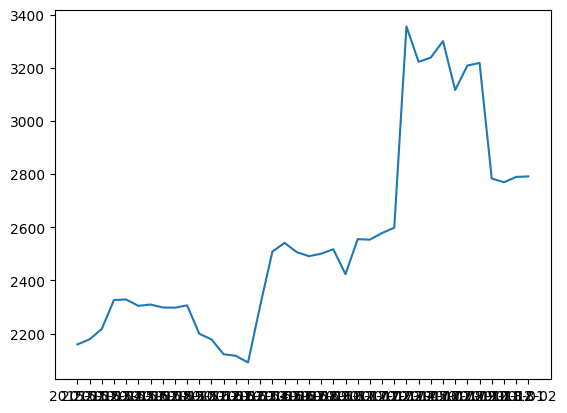

In [136]:
precio_promedio_compra_caba.columns = ["Fecha", "Precio"]
plt.plot(precio_promedio_compra_caba["Fecha"],precio_promedio_compra_caba["Precio"])
plt.show()

In [148]:
df_ml_compra["Fecha"] = df_ml_compra["Fecha"].str[:7]

In [149]:
precio_promedio = pd.concat([precio_promedio_compra_caba, df_ml_compra])

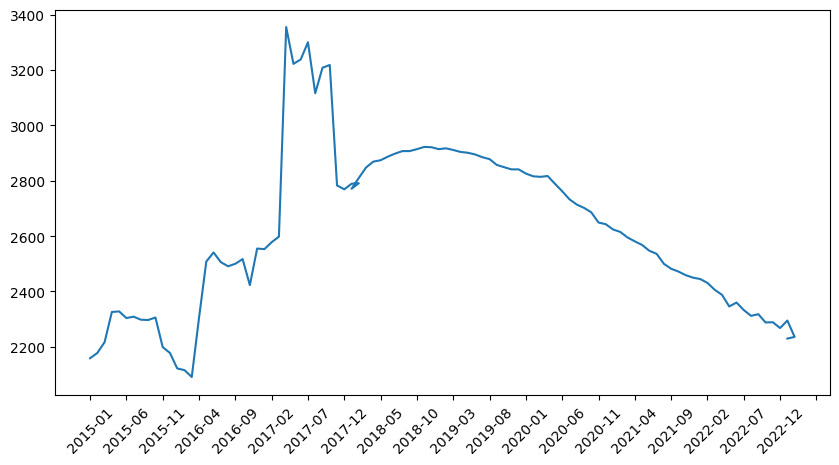

In [155]:
plt.figure(figsize=[10,5])
plt.plot(precio_promedio["Fecha"],precio_promedio["Precio"])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(axis='x', rotation=45)
plt.show()

In [202]:
precio_mediana_compra_caba = df_compra_caba.groupby("año_mes")["price_usd_per_m2"].median().reset_index()
precio_mediana_compra_caba.columns = ["Fecha", "Precio"]

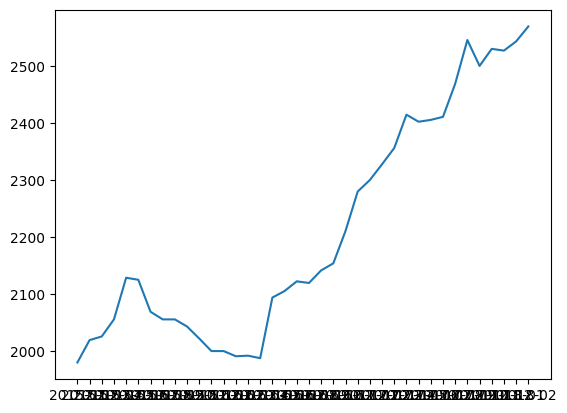

In [203]:
plt.plot(precio_mediana_compra_caba["Fecha"], precio_mediana_compra_caba["Precio"])
plt.show()

In [186]:
print(precio_mediana_compra_caba.tail(5).reset_index(drop=True))
print(df_ml_compra.head(5))

     Fecha       Precio
0  2017-10  2500.000000
1  2017-11  2529.950000
2  2017-12  2526.881720
3  2018-01  2542.986507
4  2018-02  2569.194444
     Fecha  Precio
0  2018-01    2771
1  2018-02    2810
2  2018-03    2848
3  2018-04    2869
4  2018-05    2874


In [204]:
diferencia_porcentual = (df_ml_compra.head(5)['Precio'] - precio_mediana_compra_caba.tail(5)['Precio'].reset_index(drop=True)) / precio_mediana_compra_caba.tail(5)['Precio'].reset_index(drop=True)

media_diferencia_porcentual = diferencia_porcentual.mean()

print(f"La diferencia media porcentual es de {round(media_diferencia_porcentual*100,2)}%")

La diferencia media porcentual es de 11.86%


In [205]:
precio_mediana_compra_caba["Precio"] = precio_mediana_compra_caba["Precio"]*(1+media_diferencia_porcentual)

In [206]:
precio_mediana = pd.concat([precio_mediana_compra_caba,df_ml_compra])

In [208]:
precio_mediana.drop_duplicates(subset="Fecha",inplace = True)

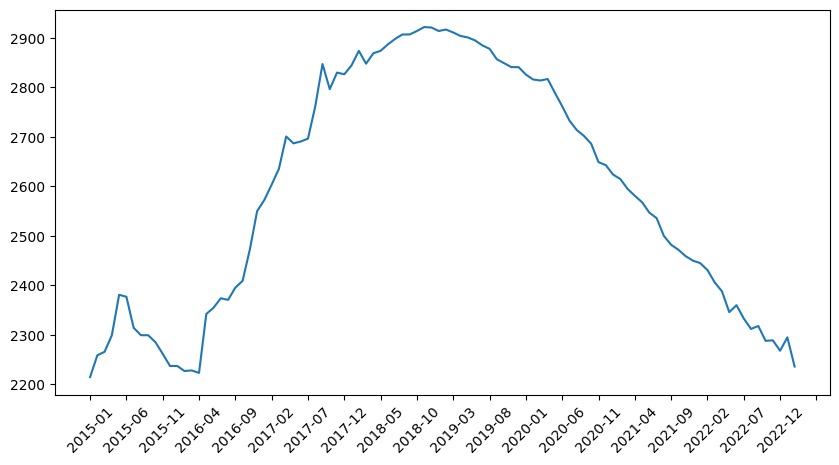

In [209]:
plt.figure(figsize=[10,5])
plt.plot(precio_mediana["Fecha"],precio_mediana["Precio"])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(axis='x', rotation=45)
plt.show()

In [213]:
precio_mediana["Precio"] = precio_mediana["Precio"].astype(int)

In [214]:
precio_mediana.to_csv("dataset/concat_properati_ml.csv", index = False)

In [161]:
#Tipo de vivienda que mas aumento entre x fechas
#Analisis por barrio
#Analisis de tamaño